# <div style="text-align: center; background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">Playground Series Season - California Housing Dataset</div>

![image](https://managecasa.com/wp-content/uploads/2021/02/shutterstock_1731900589-e1612637876218-995x460.jpg)

<h3 style="text-align: left;background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset</h3>


* MedInc - median income in block group
* HouseAge - median house age in block group
* AveRooms - average number of rooms per household
* AveBedrms - average number of bedrooms per household
* Population - block group population
* AveOccup - average number of household members
* Latitude - block group latitude
* Longitude - block group longitude


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents</b></h3>
    
* [1. Import Necessary Libraries](#1)<br>
    -[1.1 Data Analysis](#1.1)<br>
    -[1.2 Plot Analysis](#1.2)<br>
    -[1.3 Map Visualize](#1.3)<br>
    -[1.4 Correlation Matrix](#1.4)<br>
* [2. Feature Selection](#2)
* [3. Model](#3)

<a id="1"></a>
# <div style="text-align: center; background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings 
warnings.filterwarnings('ignore')

<a id="1.1"></a>
## <div style="text-align: left; background-color:#70d4e6; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">1.1 Data Analysis</div>

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e1/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e1/sample_submission.csv')

In [3]:
train.head()

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1   1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2   2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3   3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4   4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


<a id="1.2"></a>
## <div style="text-align: left; background-color:#70d4e6; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">1.2 Plot Analysis</div>

In [5]:
def plot_(data):
    fig = make_subplots(rows=1, cols=2, start_cell="bottom-left")
    fig.add_trace(go.Histogram(x=data),row=1, col=1)
    fig.add_trace(go.Box(y=data),row=1, col=2)
    fig.show()

In [6]:
plot_(train['MedInc'])

In [7]:
plot_(train['HouseAge'])

In [8]:
plot_(train['AveRooms'])

In [9]:
plot_(train['AveBedrms'])

In [10]:
plot_(train['Population'])

In [11]:
plot_(train['AveOccup'])

In [12]:
plot_(train['MedHouseVal'])

<a id="1.3"></a>
## <div style="text-align: left; background-color:#70d4e6; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">1.3 Map Visualize</div>

In [13]:
import plotly.express as px

fig = px.scatter_mapbox(train, lat='Latitude', lon='Longitude',
                        color_discrete_sequence=["blue"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<a id="1.4"></a>
## <div style="text-align: left; background-color:#70d4e6; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">1.4 Correlation Matrix</div>

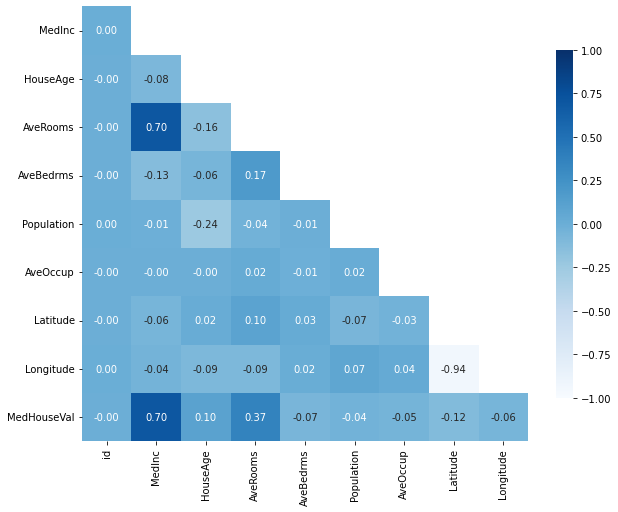

In [14]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

<a id="2"></a>
# <div style="text-align: center; background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Feature Selection</div>

In [15]:
df_train = train.drop(columns=['id','Latitude', 'Longitude', 'MedHouseVal'])

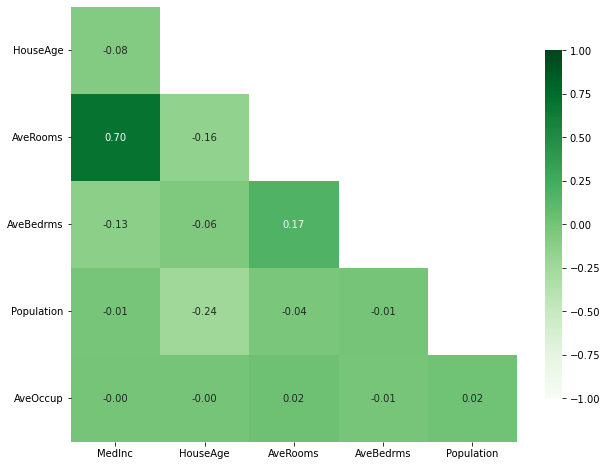

In [16]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Greens', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()

In [17]:
df_vif = pd.DataFrame()
df_vif['features'] = df_train.columns
df_vif['vif'] = [variance_inflation_factor(df_train.values, i) for i in range(len(df_train.columns))]
df_vif

features        vif
0      MedInc  11.990661
1    HouseAge   5.612441
2    AveRooms  45.025151
3   AveBedrms  33.535922
4  Population   2.715295
5    AveOccup   2.085474

<a id="3"></a>
# <div style="text-align: center; background-color:#319bad; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Model</div>

In [18]:
random = 42

In [19]:
from sklearn.datasets import fetch_california_housing

external_data = fetch_california_housing()
train2 = pd.DataFrame(external_data['data'])


In [20]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'


external_data = fetch_california_housing()
train2 = pd.DataFrame(external_data['data'])
train2[target] = external_data['target']
train2.columns = features+[target]
train_all = pd.concat([train,train2],axis=0).drop_duplicates()

In [21]:
train_all

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      0.0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989   
1      1.0  3.7188      17.0  6.013373   1.054217      1504.0  3.813084   
2      2.0  4.7750      27.0  6.535604   1.103175      1061.0  2.464602   
3      3.0  2.4138      16.0  3.350203   0.965432      1255.0  2.089286   
4      4.0  3.7500      52.0  4.284404   1.069246      1793.0  1.604790   
...    ...     ...       ...       ...        ...         ...       ...   
20635  NaN  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  NaN  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  NaN  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  NaN  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  NaN  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  MedHouseVal  
0         34.60    -120.12        0.980  
1         38.69    -121.22        0.946  
2         34.71    -120.45        1.576  
3         32.66    -117.09        1.336  
4         37.80    -122.41        4.500  
...         ...        ...          ...  
20635     39.48    -121.09        0.781  
20636     39.49    -121.21        0.771  
20637     39.43    -121.22        0.923  
20638     39.43    -121.32        0.847  
20639     39.37    -121.24        0.894  

[57777 rows x 10 columns]

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [23]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57777 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  float64
 1   MedInc       57777 non-null  float64
 2   HouseAge     57777 non-null  float64
 3   AveRooms     57777 non-null  float64
 4   AveBedrms    57777 non-null  float64
 5   Population   57777 non-null  float64
 6   AveOccup     57777 non-null  float64
 7   Latitude     57777 non-null  float64
 8   Longitude    57777 non-null  float64
 9   MedHouseVal  57777 non-null  float64
dtypes: float64(10)
memory usage: 4.8 MB


In [24]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import PolynomialFeatures

x = train_all.iloc[:, 1:-1].values
y = train_all.iloc[:, -1].values

pt = PolynomialFeatures()
transformer = pt.fit(x)
x = transformer.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=random)

params= {'learning_rate':0.02,
         'lambda_l1': 1.945,
         'num_leaves': 87,
         'feature_fraction': 0.79,
         'bagging_fraction': 0.93,
         'bagging_freq': 4,
         'min_data_in_leaf': 103,
         'max_depth': 17,
         'num_iterations':100000}

model = lgbm.LGBMRegressor(**params)   

model.fit(X=x_train,y= y_train,eval_set = (x_test,y_test), early_stopping_rounds=85,verbose=50)
preds = model.predict(x_test)
rmse = mse(y_test, preds,squared=False)
print(f'=== RMSE {rmse} ====')

[LightGBM] [Warning] lambda_l1 is set=1.945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945
[LightGBM] [Warning] bagging_fraction is set=0.93, subsample=1.0 will be ignored. Current value: bagging_fraction=0.93
[LightGBM] [Warning] feature_fraction is set=0.79, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.79
[LightGBM] [Warning] min_data_in_leaf is set=103, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=103
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[50]	valid_0's l2: 0.48962
[100]	valid_0's l2: 0.338543
[150]	valid_0's l2: 0.296513
[200]	valid_0's l2: 0.281013
[250]	valid_0's l2: 0.275043
[300]	valid_0's l2: 0.272077
[350]	valid_0's l2: 0.270565
[400]	valid_0's l2: 0.269561
[450]	valid_0's l2: 0.26888
[500]	valid_0's l2: 0.268286
[550]	valid_0's l2: 0.268089
[600]	valid_0's l2: 0.267913
[650]	valid_0's l2: 0.267735
[700]	valid_0's l2: 0.267483
[750]	valid_0

In [25]:
test.drop(columns=['id'],inplace=True)

In [26]:
x2 = transformer.transform(test)
resul = model.predict(x2)

In [27]:
sub['MedHouseVal'] = resul

In [28]:
sub.to_csv("submission.csv", index=False)